In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

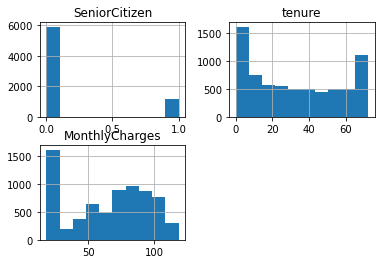

In [6]:
df.hist()

<AxesSubplot:>

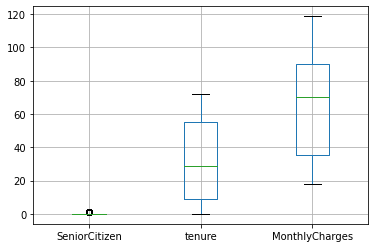

In [7]:
df.boxplot()

# Demographic popluar with the brand

In [14]:
gender = df['gender']

gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [4]:

df2 = df[['gender','SeniorCitizen','MonthlyCharges','Contract','Churn']]


In [5]:
 df3=df2.groupby(['Churn', 'gender','SeniorCitizen']).agg(['mean', 'count'])
df3

MonthlyCharges      
                                     mean count
Churn gender SeniorCitizen                     
No    Female 0                  58.673413  2221
             1                  81.921341   328
      Male   0                  58.564429  2287
             1                  76.523817   338
Yes   Female 0                  73.030615   699
             1                  80.000625   240
      Male   0                  71.560303   694
             1                  81.438347   236

# Expensive services leading to Churn

In [49]:


df4=df.iloc[:,6:14]

df4[['Charges','Churn']]=df[['MonthlyCharges','Churn']]

df4=df4[df4['Churn']=="Yes"]

df4




,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Charges,Churn
2,Yes,No,DSL,Yes,Yes,No,No,No,53.85,Yes
4,Yes,No,Fiber optic,No,No,No,No,No,70.70,Yes
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,99.65,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,104.80,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,103.70,Yes
...,...,...,...,...,...,...,...,...,...,...
7021,Yes,No,DSL,No,No,No,Yes,Yes,59.80,Yes
7026,Yes,No,DSL,No,No,No,No,No,44.20,Yes
7032,Yes,Yes,Fiber optic,No,No,No,No,No,75.75,Yes
7034,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,102.95,Yes


In [50]:
df4['Charges'].describe()


count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Charges, dtype: float64

# Mean Cost and Churn of Internet Services

In [51]:
df4['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [114]:
#mean charges when internet service is dsl with churn
df5=df4[df4['InternetService']=='DSL']

df5['Charges'].mean()


49.0832244008715

In [115]:
#mean charges when internet service is fibre with churn
df6=df4[df4['InternetService']=='Fiber optic']

df6['Charges'].mean()


88.1264841942945

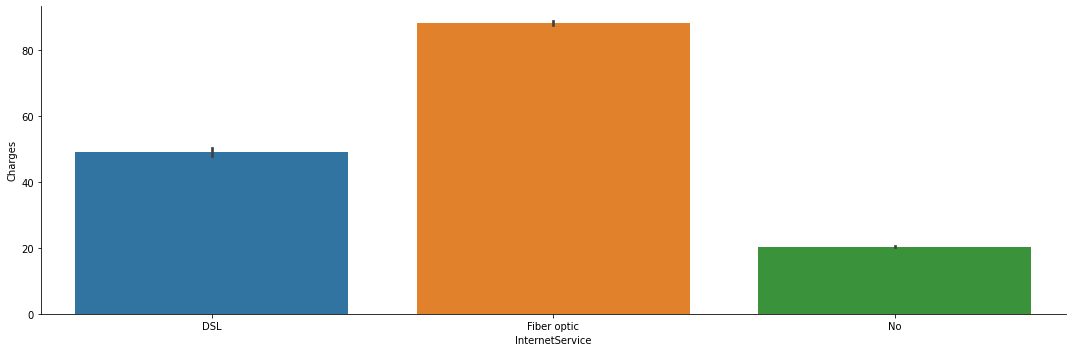

In [57]:
#mean charges for different Internet Services
sns.catplot(x='InternetService',y='Charges',kind="bar",data=df4,height=5,aspect=3)


In [126]:
#churn rate for different internet service 
figsize=(5,3)

CrosstabResult1=pd.crosstab(index=df['InternetService'],columns=df['Churn'])
CrosstabResult1


Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<AxesSubplot:xlabel='InternetService'>

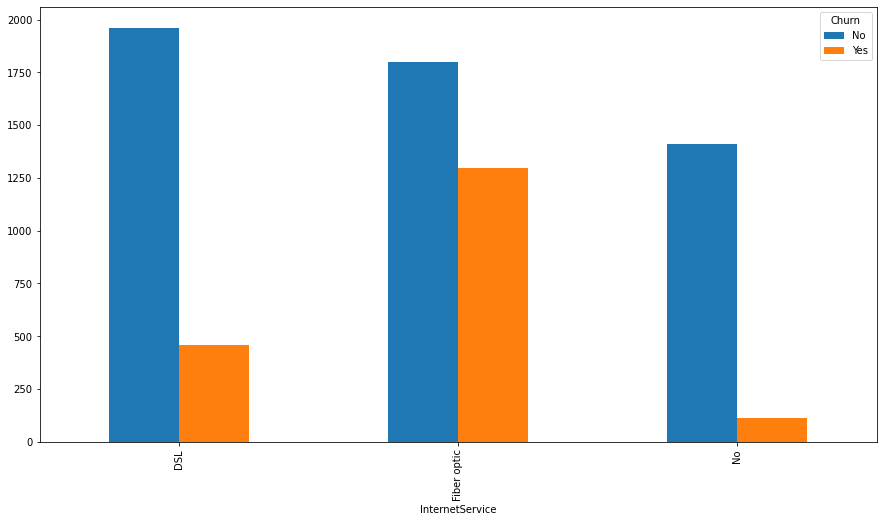

In [123]:
CrosstabResult.plot(figsize=(15,8),kind="bar")

# Churn And cost for mobile services

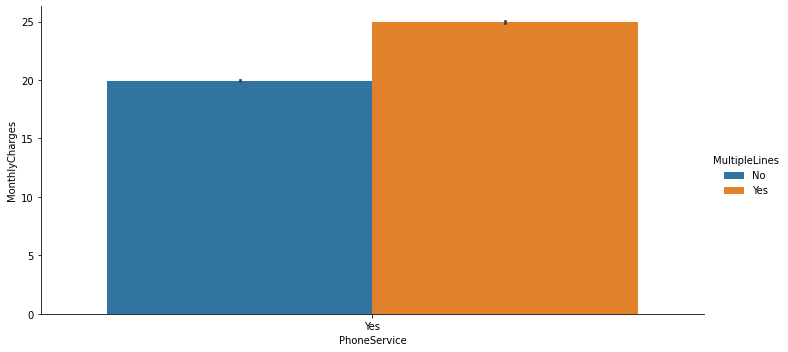

In [121]:
#mean Cost when phone service is yes or no, with and without multiple lines
df7=df[df['InternetService']=="No"]

df7=df7[['PhoneService','MultipleLines','MonthlyCharges','Churn']]


df8=df7.groupby(['PhoneService','MultipleLines'])['MonthlyCharges'].mean().unstack()


sns.catplot(x='PhoneService',y='MonthlyCharges',hue='MultipleLines',kind="bar",data=df7,height=5,aspect=2)

In [130]:
#churn rate  for Multiple lines service

CrosstabResult2=pd.crosstab(index=df['MultipleLines'],columns=df['Churn'])


CrosstabResult2


Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


<AxesSubplot:xlabel='MultipleLines'>

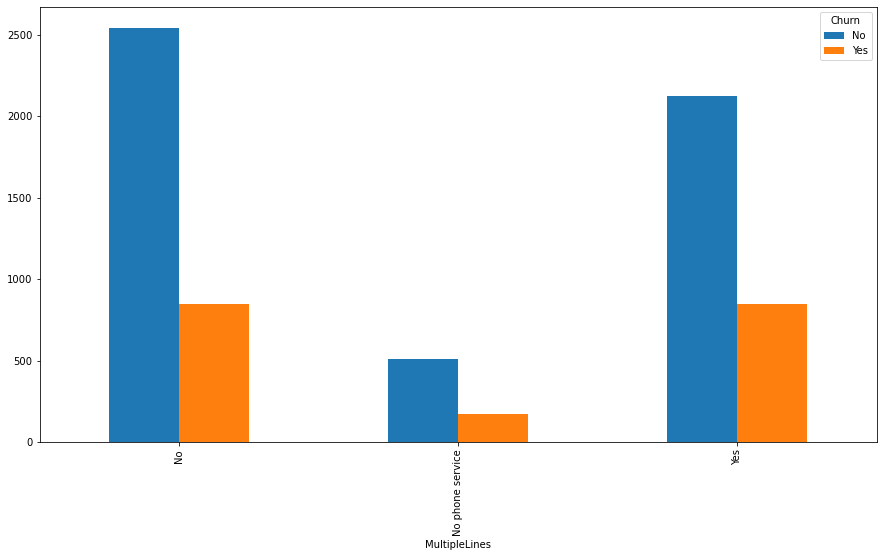

In [129]:
CrosstabResult2.plot(kind="bar",figsize=(15,8))

# Mean Cost & Churn rate for other services


Mean cost

<AxesSubplot:xlabel='InternetService'>

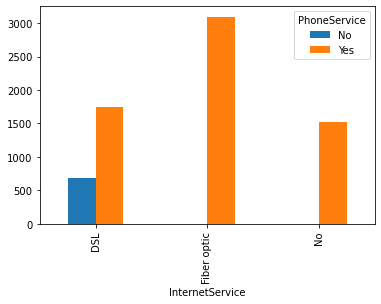

In [83]:
#control the phone service factor to get cost of other Internet services
CrosstabResult=pd.crosstab(index=df['InternetService'],columns=df['PhoneService'])

CrosstabResult.plot(kind="bar")


In [95]:
#mean charges for other services
df9=df[df['InternetService']=='DSL']

df9=df9[df9['PhoneService']=='No']


df9=df9[['TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','MonthlyCharges']]

dfx=df9.groupby(['DeviceProtection','TechSupport','OnlineBackup','OnlineSecurity'])['MonthlyCharges'].mean().unstack()

dfx


OnlineSecurity                                    No        Yes
DeviceProtection TechSupport OnlineBackup                      
No               No          No            30.484351  35.726316
                             Yes           37.997656  42.272727
                 Yes         No            35.532857  39.998571
                             Yes           39.984091  45.746667
Yes              No          No            42.354255  43.872222
                             Yes           46.748611  50.383929
                 Yes         No            46.154545  50.933673
                             Yes           53.985484  57.289815

<AxesSubplot:xlabel='DeviceProtection,TechSupport,OnlineBackup'>

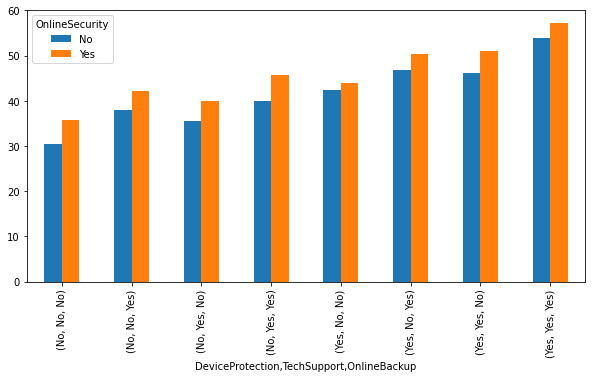

In [96]:
dfx.plot(kind="bar",figsize=(10,5))

Churn Rate

<AxesSubplot:xlabel='TechSupport'>

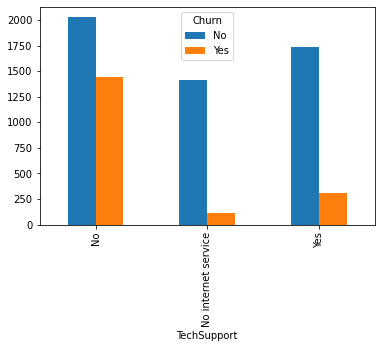

In [132]:
#Tech Services


CrosstabResult=pd.crosstab(index=df['TechSupport'],columns=df['Churn'])

CrosstabResult.plot(kind="bar")


<AxesSubplot:xlabel='OnlineBackup'>

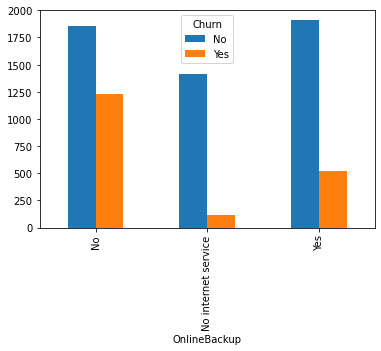

In [134]:
#Online Backup
CrosstabResult=pd.crosstab(index=df['OnlineBackup'],columns=df['Churn'])

CrosstabResult.plot(kind="bar")

<AxesSubplot:xlabel='OnlineSecurity'>

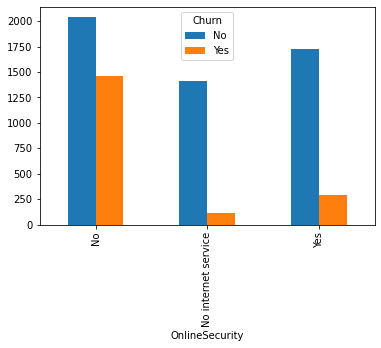

In [137]:
#Online Security
CrosstabResult=pd.crosstab(index=df['OnlineSecurity'],columns=df['Churn'])

CrosstabResult.plot(kind="bar")

<AxesSubplot:xlabel='DeviceProtection'>

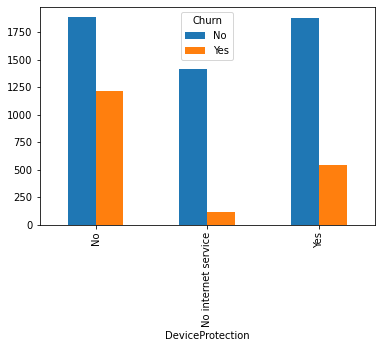

In [139]:
#DeviceProtection
CrosstabResult=pd.crosstab(index=df['DeviceProtection'],columns=df['Churn'])

CrosstabResult.plot(kind="bar")

In [150]:
analysis ={"service":["Phone","Multiple Lines","Fiber","DSL","Device Protection","online Security","Online Backup","Tech Support"]
           ,"Cost":['20','25','88','49','42','35','37','35'],"Churn":['849','850','1297','459','545','295','523','310']}

analysis=pd.DataFrame(analysis)

analysis['Cost']=pd.to_numeric(analysis['Cost'])
analysis['Churn']=pd.to_numeric(analysis['Churn'])

analysis

,service,Cost,Churn
0,Phone,20,849
1,Multiple Lines,25,850
2,Fiber,88,1297
3,DSL,49,459
4,Device Protection,42,545
5,online Security,35,295
6,Online Backup,37,523
7,Tech Support,35,310


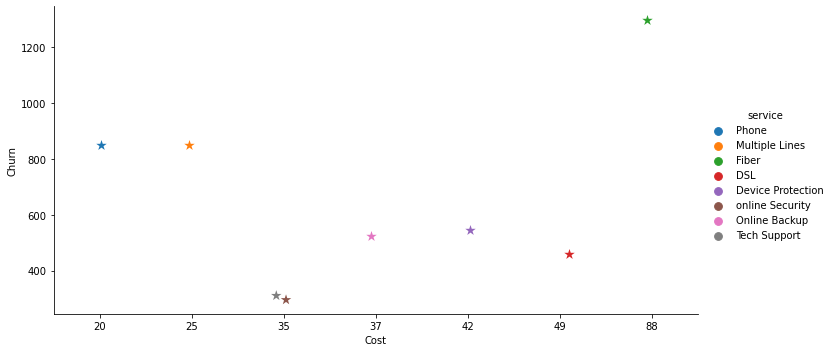

In [169]:
sns.catplot(x='Cost',y='Churn',hue="service",data=analysis,height=5,aspect=2,marker="*",s=11)

# Phone As a Stand alone Service 

In [65]:
# phone contracts as a standalone service
df11=df[df['OnlineSecurity']=="No internet service"]

df11 = df11[['MonthlyCharges','Contract','PhoneService','Churn']]

df11 = df11[df11['PhoneService']=="Yes"]
df11



,MonthlyCharges,Contract,PhoneService,Churn
11,18.95,Two year,Yes,No
16,20.65,One year,Yes,No
21,19.80,One year,Yes,No
22,20.15,Month-to-month,Yes,Yes
33,20.20,Month-to-month,Yes,No
...,...,...,...,...
7017,20.65,Two year,Yes,No
7019,20.15,Two year,Yes,No
7020,19.20,Month-to-month,Yes,No
7030,20.05,Month-to-month,Yes,No


<AxesSubplot:xlabel='Contract'>

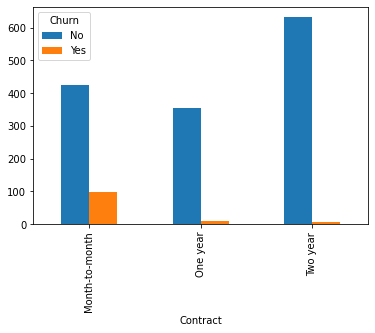

In [37]:
#churn rate of different contracts 
CrosstabResult=pd.crosstab(index=df5['Contract'],columns=df5['Churn'])

CrosstabResult.plot(kind="bar")

In [66]:
#churn numbers 
df12=df5[df5['Churn']=='Yes']
df13 =pd.DataFrame(df12.groupby(['Contract'])['Churn'].count())
df13

,Churn
Contract,
Month-to-month,99
One year,9
Two year,5


# Streamlining Packages to avoid Churn

In [8]:
#binning data

bin_labels = ['Basic','Plus','Premium']

df14=df

df14['packages']=pd.qcut(df['MonthlyCharges'], q=[0, .33,.66,1],
                              labels=bin_labels)


df14

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,packages
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Basic
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Plus
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Plus
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Basic
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Premium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Premium
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Basic
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Plus


In [9]:
#pricing for every package to reduce Churn
df15 =df14.groupby(['packages','Churn'])['MonthlyCharges'].mean().unstack()

df15

Churn,No,Yes
packages,,
Basic,26.623444,33.819210
Plus,67.587835,70.894444
Premium,97.814327,95.632518


# Payment Method 

<AxesSubplot:xlabel='PaymentMethod'>

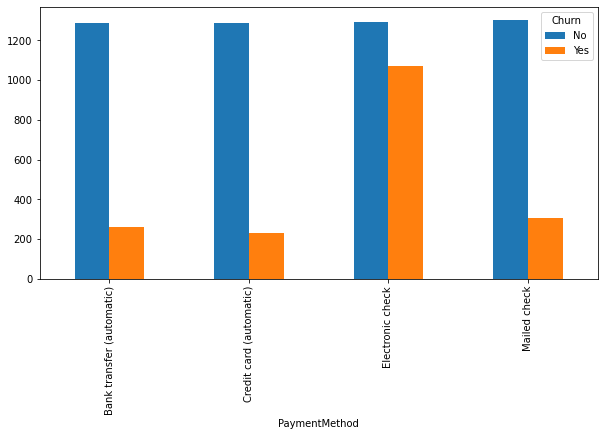

In [49]:
#relationship between payment method and churn 
df['PaymentMethod'].unique()

CrosstabResult=pd.crosstab(index=df['PaymentMethod'],columns=df['Churn'])

CrosstabResult.plot(kind="bar",figsize=(10,5))